# Funciones de probabilidad

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
a = 1
b = 100
n = 2000
data = np.random.uniform(a, b, n)

(array([194., 191., 217., 186., 198., 185., 200., 228., 203., 198.]),
 array([ 1.07433008, 10.96232203, 20.85031398, 30.73830593, 40.62629788,
        50.51428983, 60.40228178, 70.29027373, 80.17826568, 90.06625763,
        99.95424957]),
 <a list of 10 Patch objects>)

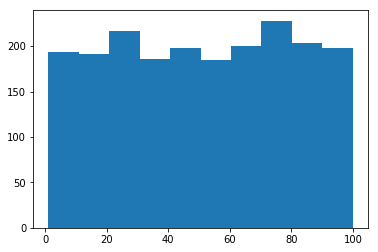

In [32]:
plt.hist(data)

## distribucion normal

In [33]:
n = 10000
data = np.random.randn(n)

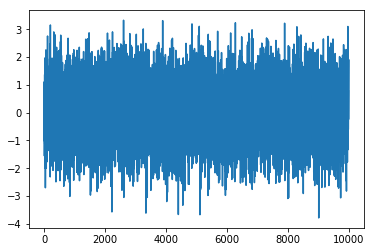

In [34]:
x = range(1,n+1)
plt.plot(x,data)

(array([   6.,   20.,   92.,  267.,  688., 1258., 1781., 1965., 1732.,
        1153.,  674.,  265.,   78.,   21.]),
 array([-3.78318082, -3.27576779, -2.76835476, -2.26094173, -1.75352871,
        -1.24611568, -0.73870265, -0.23128962,  0.27612341,  0.78353644,
         1.29094947,  1.7983625 ,  2.30577553,  2.81318856,  3.32060159]),
 <a list of 14 Patch objects>)

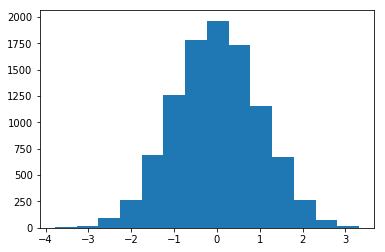

In [35]:
plt.hist(data,14)

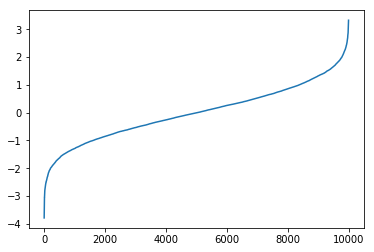

In [36]:
plt.plot(x,sorted(data))

(array([   4.,   26.,  106.,  415.,  972., 1639., 2110., 2017., 1487.,
         814.,  299.,   90.,   18.,    3.]),
 array([-4.00929224, -2.62698723, -1.24468222,  0.1376228 ,  1.51992781,
         2.90223282,  4.28453784,  5.66684285,  7.04914786,  8.43145288,
         9.81375789, 11.1960629 , 12.57836792, 13.96067293, 15.34297794]),
 <a list of 14 Patch objects>)

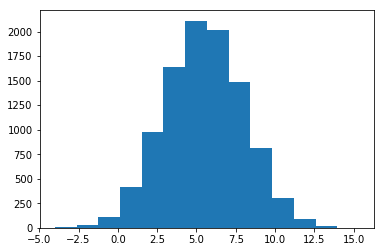

In [37]:
mu = 5.5
sd = 2.5
data = mu + sd*np.random.randn(n)
plt.hist(data,14)

In [38]:
data = np.random.rand(2,10000)

In [39]:
data

array([[0.50206367, 0.84559956, 0.27003219, ..., 0.38871043, 0.94061337,
        0.74306244],
       [0.14291451, 0.07099748, 0.3889745 , ..., 0.48162535, 0.17929735,
        0.61953839]])

## Metodo de Monte-Carlo

* paso 1: genero 2 numeros (x e y) aletorios entre 0 1
* paso 2: calcularemos x^2 + y^2
    * si el valor es inferior a 1 estoy dentro del circulo
    * si el valor es superior a 1 estoy fuera del circulo
* paso 3: calculamos el numero total de puntos que estan dentro del circulo y lo dividimos por el numero total de intentos
* paso 4: multiplico por 4 y aproximo pi
* paso 5: repetimos el experimento para obtenemos varios valores de pi
* paso 6: calculo el promedio y obtengo una muy buena aproximacion de pi

In [52]:
def pi_monte_carlo(numero_experimentos, intentos):
    pi_avg = 0
    pi_value_list = []
    for i in range(numero_experimentos):
        value = 0
        x = np.random.uniform(0, 1, intentos)
        y = np.random.uniform(0, 1, intentos)
        for j in range(intentos):
            z = np.sqrt(x[j]*x[j] + y[j]*y[j])
            if z<=1:
                value+=1

        float_value = float(value)
        pi_value = 4*float_value/intentos
        pi_value_list.append(pi_value)
        pi_avg += pi_value
    pi = pi_avg/numero_experimentos
    return pi


In [53]:
pi = pi_monte_carlo(300,1000)

In [54]:
print(pi)

3.146533333333332


## Generando Dummy Datasets 

In [61]:
n=100000
data = pd.DataFrame(
    {
        'A': np.random.randn(n),
        'B': 1.5+2.5*np.random.randn(n),
        'C': np.random.uniform(5, 32, n)
    }
)

In [64]:
data.describe()

,A,B,C
count,100000.000000,100000.000000,100000.000000
mean,0.002679,1.508010,18.519990
std,1.001286,2.507145,7.812947
min,-4.267355,-8.875217,5.000070
25%,-0.675267,-0.189565,11.749143
50%,0.005723,1.513115,18.546812
75%,0.679099,3.197811,25.302297
max,4.751177,12.032312,31.999832


(array([10068.,  9995.,  9898.,  9972.,  9894., 10034.,  9990.,  9937.,
        10101., 10111.]),
 array([ 5.00006951,  7.70004579, 10.40002207, 13.09999835, 15.79997463,
        18.49995091, 21.19992719, 23.89990347, 26.59987975, 29.29985603,
        31.99983231]),
 <a list of 10 Patch objects>)

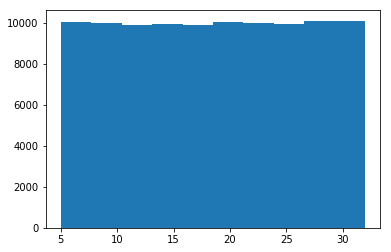

In [65]:
plt.hist(data['C'])

In [66]:
data = pd.read_csv('datasets/customer-churn-model/Customer Churn Model.txt')

In [68]:
colum_names = data.columns.values.tolist()

In [69]:
a = len(colum_names)
a

21

In [72]:
new_data = pd.DataFrame(
        {
            'Column Name': colum_names,
            'A': np.random.randn(a),
            'B': 1.5+2.5*np.random.randn(a),
            'C': np.random.uniform(0, 1, a)
        }, index = range(42,42+a)
    )

In [73]:
new_data

,Column Name,A,B,C
42,State,2.454716,-0.115022,0.499149
43,Account Length,-1.864840,2.603915,0.105833
44,Area Code,0.342459,-1.836076,0.500908
45,Phone,-0.788804,2.618914,0.080556
46,Int'l Plan,0.579229,3.613531,0.439934
47,VMail Plan,-0.700680,-0.993206,0.414349
48,VMail Message,-0.196155,0.713632,0.783599
49,Day Mins,0.713034,2.839223,0.759911
50,Day Calls,-1.770506,-2.356514,0.004556
51,Day Charge,-1.836767,0.064177,0.057655
